<a href="https://colab.research.google.com/github/kavita200496/Customer-Churn-Analysis/blob/master/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT
You are the Data scientist at a telecom company "Neo" whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
customer_churn = pd.read_csv(r"Customer_churn.csv")

In [ ]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Manipulation

In [ ]:
c_15 = customer_churn.iloc[:,14] #Extract 15 column
c_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [ ]:
senior_male_electronics = customer_churn[(customer_churn['gender'] == "Male") & (customer_churn['SeniorCitizen'] == 1) & (customer_churn['PaymentMethod'] == "Electronic check")]
senior_male_electronics.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [ ]:
customer_total_tenure = customer_churn[(customer_churn['tenure'] > 70) | (customer_churn['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [ ]:
two_mail_yes = customer_churn[(customer_churn['Contract'] == "Two year" ) & (customer_churn['PaymentMethod'] == 'Mailed check') & (customer_churn['Churn'] == 'Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
#Extract 333 random records from dataset
customer_333 = customer_churn.sample(n=333)
customer_333.head() #everything new value

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6094,7493-GVFIO,Male,0,No,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1252.85,No
2902,1658-TJVOA,Female,1,No,No,6,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.10,450.9,No
5241,7753-USQYQ,Male,0,No,No,55,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Electronic check,64.20,3627.3,No
890,5898-IGSLP,Male,0,Yes,Yes,31,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,89.30,2823,No
182,9367-WXLCH,Male,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),84.50,662.65,Yes


In [ ]:
#Get the count of different levels from the 'Churn' column
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

DATA VISUALIZATION

Text(0.5, 1.0, 'Distribution of Internet Services')

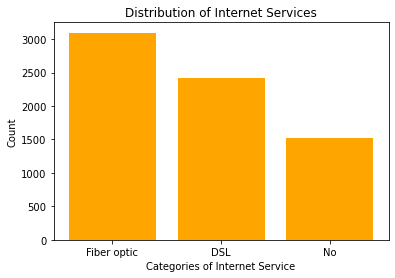

In [ ]:
#Build a bar-plot for the 'InternetService' column
plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(), customer_churn['InternetService'].value_counts().tolist(), color = 'orange')
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count")
plt.title("Distribution of Internet Services")

Text(0.5, 1.0, 'Distribution of tenure')

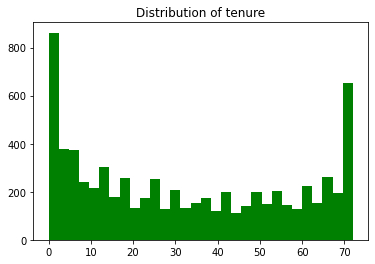

In [ ]:
#Build histogram for tenure column
plt.hist(customer_churn['tenure'], bins = 30, color = 'green')
plt.title("Distribution of tenure")

Text(0.5, 1.0, 'Monthly charges vs Tenure')

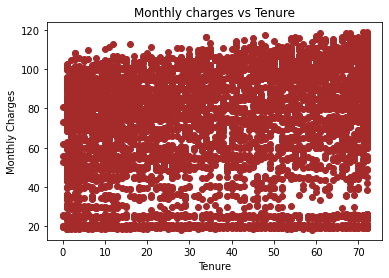

In [ ]:
#Built scatter plot between monthly charges & tenure
plt.scatter(x=customer_churn['tenure'], y = customer_churn['MonthlyCharges'], color = 'brown')
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Monthly charges vs Tenure")

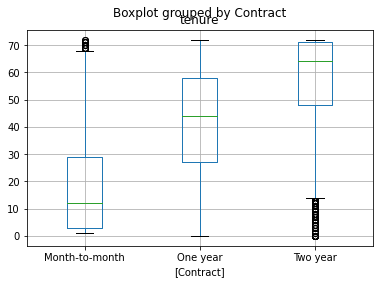

In [ ]:
#Build a box-plot between tenure & Contract
customer_churn.boxplot(column = ['tenure'], by = ['Contract'])

DATA PREPROCESSING

In [ ]:
#Build a simple linear model where dependent variable is 'MonthlyCharges' and independent variable is 'tenure'
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = customer_churn[['MonthlyCharges']]
x = customer_churn[['tenure']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4930, 1), (2113, 1), (4930, 1), (2113, 1))

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred[:5], y_test[:5]

(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),
       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [ ]:
#lower root mean better model
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

29.394584027273893

In [ ]:
#Build a simple logistic regression model where dependent variable is 'Churn' & independent variables is' MonthlyCharges'
x = customer_churn[['MonthlyCharges']]
y = customer_churn[['Churn']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\91880\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[1815,    0],
        [ 651,    0]], dtype=int64),
 0.7360097323600974)

In [ ]:
((1815+0)/(1815+651+0+0))

0.7360097323600974

In [ ]:
#Build a multiple logistic regression model where dependent variable is 'Churn' & independent variables are 'tenure' &  'MonthlyCharges'
x = customer_churn[['MonthlyCharges', 'tenure']]
y = customer_churn[['Churn']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\91880\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = log_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[934, 107],
        [212, 156]], dtype=int64),
 0.7735982966643009)

In [ ]:
(934+156)/(934+107+212+156)

0.7735982966643009

In [ ]:
#Build a decision tree model where dependent variable is 'Churn' & independent variable is 'tenure'
x= customer_churn[['tenure']]
y = customer_churn[['Churn']]

from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
my_tree = DecisionTreeClassifier()
my_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = my_tree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [ ]:
(965+87)/(965+76+281+87)

0.7466288147622427

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\91880\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[965,  76],
       [281,  87]], dtype=int64)

In [ ]:
accuracy_score(y_test, y_pred)

0.7466288147622427